<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/QuinnWorks_123_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# Function

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):

  for n in range(1,10):
    
    prob_pos_drunk = 1
    #prob_drunk_prior = prob_drunk_prior
    #false_positive_rate = false_positive_rate
    prob_notdrunk = 1- prob_drunk_prior
    num = (prob_pos_drunk*prob_drunk_prior)
    dem = (prob_pos_drunk*prob_drunk_prior) + (false_positive_rate*prob_notdrunk)
    posterior_probability = num/dem

    if posterior_probability >.95:
      break
      print(posterior_probability)
      print(n)
      
    else:
      prob_drunk_prior = posterior_probability
      n=n+1
      
  return posterior_probability, n


In [6]:
prob_drunk_given_positive(.005,.01)

(0.9804882831650161, 2)

In [7]:
#Hypothesis: Probability of Drunk given
#Evidence: test is Positive
#What is the probability that a person is drunk after one positive breathalyzer test?
prob_pos_drunk = 1
prob_drunk_prior = .001
false_positive_rate = .08
prob_notdrunk = 1- prob_drunk_prior 
num = (prob_pos_drunk*prob_drunk_prior)
dem = (prob_pos_drunk*prob_drunk_prior) + (false_positive_rate*prob_notdrunk)
posterior_probability = num/dem
posterior_probability

0.012357884330202669

In [8]:
#What is the probability that a person is drunk after two positive breathalyzer tests?
prob_pos_drunk = 1
prob_drunk_prior = 0.012357884330202669
false_positive_rate = .08
prob_notdrunk = 1- prob_drunk_prior 
num = (prob_pos_drunk*prob_drunk_prior)
dem = (prob_pos_drunk*prob_drunk_prior) + (false_positive_rate*prob_notdrunk)
posterior_probability = num/dem
posterior_probability

0.13525210993291495

In [9]:
#How many positive breathalyzer tests are needed in order to have a probability 
#that's greater than 95% that a person is drunk beyond the legal limit?
prob_drunk_given_positive(.001,.08)

(0.9606895076105054, 4)

# Explore scipy.stats.bayes_mvs

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, 
                 names=['party','handicapped-infants', 'water-project',
                        'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
                        'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
                        'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free','south-africa'],
                        na_values = "?")
df = df.replace({'y':1, 'n':0})
print(df.shape)
df.head(3)

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [12]:
dem=df[df.party == 'democrat']
rep=df[df.party == 'republican']
rep.head(2)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [13]:
dem.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [0]:
def confidence_interval (data, confidence=.95):
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  tstat = stats.t.ppf((1+confidence)/2, n-1)
  stderr = s / np.sqrt(n)
  moe = tstat * stderr
  return mean, moe, mean-moe, mean+moe

In [15]:
confidence_interval(dem['right-to-sue'])

(0.2896825396825397,
 0.05476760718618874,
 0.23491493249635098,
 0.34445014686872844)

In [16]:
mean_confidence_interval,_,_=stats.bayes_mvs(dem['right-to-sue'].dropna(),alpha=.95)
mean_confidence_interval

Mean(statistic=0.2896825396825397, minmax=(0.23329310265193048, 0.34607197671314893))

In [17]:
mean_confidence_interval[1][1]

0.34607197671314893

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


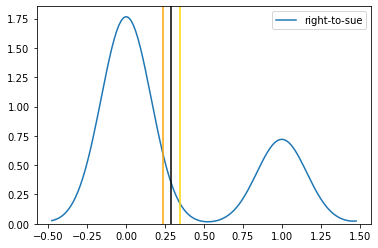

In [18]:
#Frequentist approach
sns.kdeplot(dem['right-to-sue'])
plt.axvline(x=confidence_interval(dem['right-to-sue'])[2], color='orange') #LB CI
plt.axvline(x=confidence_interval(dem['right-to-sue'])[3], color='gold') #UB CI
plt.axvline(x=confidence_interval(dem['right-to-sue'])[0], color='k'); #mean

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


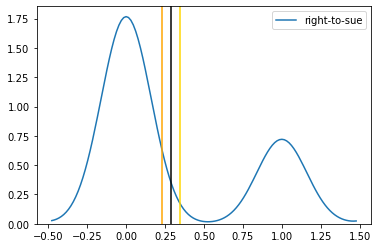

In [19]:
#Bayesian approach
sns.kdeplot(dem['right-to-sue'])
plt.axvline(x=mean_confidence_interval[1][0], color='orange')
plt.axvline(x=mean_confidence_interval[1][1], color='gold')
plt.axvline(x=mean_confidence_interval[0], color='k');

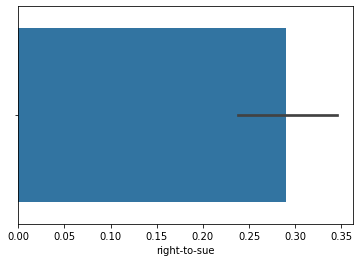

In [20]:
sns.barplot(dem['right-to-sue']);

# Bayesian and Frequentist statistics

Bayesian statistics uses prior knowledge known about a subject as an initial starting position for hypothesis testing. The prior prbablity continually updates after each test and new outcomes become additional data used as part of the sample. A frequentist statistics approach would not take into account conditions or prior knowledge.  

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!